In [3]:
import bgpsecsim.as_graph as as_graph

AS_REL_FILE = 'caida-data/20121001.as-rel.txt'
nx_graph = as_graph.parse_as_rel_file(AS_REL_FILE)

In [4]:
ORIGINAL_CONTENT_PROVIDERS = [22822, 20940, 15133, 15169, 8075, 10310, 16265, 16509, 32934, 2906, 14907, 714, 13414, 4837, 40428, 23286, 38365]
BIG7_CONTENT_PROVIDERS = [20940, 16509, 714, 32934, 15169, 8075, 2906]

In [5]:
from bgpsecsim.asys import AS, AS_ID
from bgpsecsim.as_graph import ASGraph
from bgpsecsim.routing_policy import (
    DefaultPolicy, RPKIPolicy, PathEndValidationPolicy,
    BGPsecHighSecPolicy, BGPsecMedSecPolicy, BGPsecLowSecPolicy,
)
graph = ASGraph(nx_graph, policy=RPKIPolicy())


print(graph.get_providers(BIG7_CONTENT_PROVIDERS))
        

[10242, 27781, 8069, 34695, 5511, 2828, 17676, 16397, 26769, 1299, 4755, 30740, 12182, 14743, 5400, 3352, 9498, 4760, 3356, 4637, 286, 12956, 6939, 8220, 5410, 3491, 7843, 4766, 22822, 10026, 174, 3758, 4657, 7473, 7474, 4788, 6453, 2611, 3257, 7738, 5050, 12989, 701, 6461, 18881, 24130, 2497, 5580, 209, 28625, 2516, 4436, 1239, 7004, 3549, 2914, 4323, 13030, 3303, 8551, 1257, 6762, 9318, 7018, 8167, 9070, 6128, 7922, 25074, 36086, 3320, 1273, 2686, 2687]


In [6]:
import random

n_trials = 48
as_ids = list(nx_graph.nodes)
trials = [random.choices(as_ids, k=2) for _ in range(n_trials)]

In [9]:
import statistics

from bgpsecsim.as_graph import ASGraph
import bgpsecsim.experiments as experiments

def mean(seq):
    return float(statistics.mean(seq))

line1_results = []
for deployment in range(0, 110, 10):
    print(f"Next-AS (deployment = {deployment})", deployment)
    line1_results.append(mean(experiments.figure2a_line_1_next_as(nx_graph, deployment, trials)))
print("Next-AS: ", line1_results)

line2_results = []
for deployment in range(0, 110, 10):
    print(f"BGPsec in partial deployment (deployment = {deployment})")
    line2_results.append(mean(experiments.figure2a_line_2_bgpsec_partial(nx_graph, deployment, trials)))
print("BGPsec in partial deployment: ", line2_results)

line3_results = mean(experiments.figure2a_line_3_two_hop(nx_graph, trials))
print("2-hop: ", line3_results)

line4_results = mean(experiments.figure2a_line_4_rpki(nx_graph, trials))
print("RPKI (full deployment): ", line4_results)

line5_results = mean(experiments.figure2a_line_5_bgpsec_med_full(nx_graph, trials))
print("BGPsec (full deployment, legacy allowed): ", line5_results)

RecursionError: maximum recursion depth exceeded while pickling an object

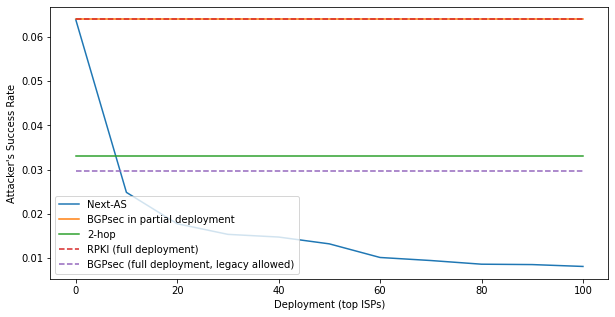

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#print("BGPsec in partial deployment: ", line2_results)
#line5_results = mean(experiments.figure2a_line_5_bgpsec_med_full(nx_graph, trials))
#print("BGPsec (full deployment, legacy allowed): ", line5_results)

deployment = np.arange(0, 110, 10)
plt.figure(figsize=(10, 5))
plt.plot(deployment, line1_results, label="Next-AS")
plt.plot(deployment, line2_results, label="BGPsec in partial deployment")
plt.plot(deployment, np.repeat(line3_results, 11), label="2-hop")
plt.plot(deployment, np.repeat(line4_results, 11), label="RPKI (full deployment)", linestyle="--")
plt.plot(deployment, np.repeat(line5_results, 11), label="BGPsec (full deployment, legacy allowed)", linestyle="--")
plt.legend()
plt.xlabel("Deployment (top ISPs)")
plt.ylabel("Attacker's Success Rate")
plt.savefig('figure3a.png')

In [ ]:
from bgpsecsim.as_graph import ASGraph

graph = ASGraph(nx_graph)
reachability = graph.determine_reachability_all()

In [ ]:
# reachability = sorted(reachability.values())
# reachability.reverse()
len(reachability), max(reachability)

In [21]:
import numpy as np

np.sum(np.array(reachability) < len(reachability) * 0.99) / len(reachability)

0.007072881430391424

In [16]:
import networkx as nx
from typing import Generator, Optional

def asyss_by_customer_count(
        graph: nx.Graph,
        min_count: Optional[int],
        max_count: Optional[int]
) -> Generator[int, None, None]:
    for node in graph:
        customer_count = sum((1
                             for neighbor in graph[node]
                             if graph[node][neighbor]['customer'] == neighbor))
        if (min_count is None or min_count <= customer_count) and (max_count is None or max_count >= customer_count):
            yield node

print(sum((1 for _ in asyss_by_customer_count(nx_graph, 250, None) )))

58


In [18]:
getattr(as_graph, 'ASGraph')

bgpsecsim.as_graph.ASGraph